# Project: TMDB Movies Data

## Overview and Notes
This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.
-  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
-  There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
-  The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

### Task Brief:
Let's suppose there is company called x,y,z, seeks to start media production business,
investigate the dataset to give statistical summary and draw conclusions on the top profitable movie to produce.


### Questions:
1- Describe the distribution of budget, revenue, profit and runtime? 

2- what is the most frequent genres ( number of occurance )?

3- what is the relatioship between profit and other factors ?

4- what are the chracteristics of top 10 most popular movies (in terms of popularity) ?

5- what is the most whatched genre (sum of runtime) ?

6- how do the revenues and profits change over years ? 

7- What are the top profitable genres ?

8- what is the average vote recieved for most profitable genre ?

9- How does the average profit of the top 4 profitable genres change over the last 10 years? 

In [1]:
# importing the necessary packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# read the csv file 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
maximum = df.max()
print('\nMaximum Value\n------')
print(maximum)


Maximum Value
------
id                     417859
popularity            32.9858
budget              425000000
revenue            2781505847
original_title       í•˜ìš¸ë§
runtime                   900
release_date           9/9/97
vote_count               9767
vote_average              9.2
release_year             2015
budget_adj           4.25e+08
revenue_adj       2.82712e+09
dtype: object


In [8]:
minimum = df.min()
print('\nMinimum Value\n------')
print(minimum)


Minimum Value
------
id                       5
popularity         6.5e-05
budget                   0
revenue                  0
original_title    $5 a Day
runtime                  0
release_date        1/1/00
vote_count              10
vote_average           1.5
release_year          1960
budget_adj               0
revenue_adj              0
dtype: object


In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Quality Report (limitations):
- There are multiple values recorded in the cast column for each movie as well as genres column.
- Categorical variables are stored as object data type
- Year of release stored as int datatype and also there is another relase date column stored as object type.
- Budget, revenue and runtime columns includes values recorded as 0 which indicate missing data.
- Currency is not provieded for the budget and revenue coulmn. 
- There are some missing values in genres, director and cast columns.
- Vote count variable significantly varies from a movie to another which mean the average vote recieved can be biased based on the number of votes recieved.
- There is one duplicated row only in our dataset.

### Data Assesment and Cleaning strategy:
- we need to separate the first value from the cast column to extract the main actor of each movie(assumption)
- do the same for genre column as the first value indicate to the main genre of the movie(assumption). 
- since the revenue and budget columns doesn't have currency symbol inddicator we will assume that the currency used is united states dollar(assumption).
- drop the relase date as there is a relase year column so it's not neccessary for our analyis.
- values of zeros in budget, revenue and runtime columns will affect the accuracy of our statistical summary so we'll drop them after a general investigation on our dataset.
- drop the columns that aren't needed for our analysis such as id , imdb_id, homepage, keywords, overview, production_companies, budget_adj and revenue_adj.
- create a column with showing the profit ( the difference between the budget and the revenue.
- we'll drop the columns with missing valuesas as well as the duplicated row .

### Data Cleaning 

In [10]:
# Extracting the main actor out of cast column   
df['main_actor'] = df['cast'].str.split('|',n=1,expand=False) 
df['main_actor'] = df['cast'].str.split('|',n=1,expand=True) 

In [11]:
# Extracting the main actor out of cast column   
df['main_genre'] = df['genres'].str.split('|',n=1,expand=False) 
df['main_genre'] = df['genres'].str.split('|',n=1,expand=True) 

In [12]:
# drop the redundant columns 
df.drop(columns=['cast','genres','id','imdb_id', 'homepage','production_companies', 'tagline', 'keywords', 'overview','release_date','original_title','budget_adj','revenue_adj'],inplace=True)

In [13]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [14]:
# Replacing 0 values in budget, revenue and runtime columns with Nan values
df['budget'] =df['budget'].replace(0, np.NAN) 
df['revenue'] =df['revenue'].replace(0, np.NAN) 
df['runtime'] =df['runtime'].replace(0, np.NAN) 

In [15]:
# dropping all rows with missing values to calucalte the profit 
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    3849 non-null   float64
 1   budget        3849 non-null   float64
 2   revenue       3849 non-null   float64
 3   director      3849 non-null   object 
 4   runtime       3849 non-null   float64
 5   vote_count    3849 non-null   int64  
 6   vote_average  3849 non-null   float64
 7   release_year  3849 non-null   int64  
 8   main_actor    3849 non-null   object 
 9   main_genre    3849 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 330.8+ KB


In [17]:
# create Profit Column 
df['profit'] = df['revenue'] - df['budget']
df.head()

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,main_actor,main_genre,profit
0,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124.0,5562,6.5,2015,Chris Pratt,Action,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,George Miller,120.0,6185,7.1,2015,Tom Hardy,Action,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Robert Schwentke,119.0,2480,6.3,2015,Shailene Woodley,Adventure,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,J.J. Abrams,136.0,5292,7.5,2015,Harrison Ford,Action,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,James Wan,137.0,2947,7.3,2015,Vin Diesel,Action,1.316249e+09


### Exploratory data analysis 

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249,7.056595e+07
std,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642,1.506990e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000,-1.312284e+06
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000,2.014450e+07
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000,8.198066e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


#### insights :
- the average popularity is 0.64 amongest ourdataset ranges between as low as .000065 to maximum of 32.99 with average vote count 5.98
- the budget values ranges from 1 which indicate wrong entry up to four hundred twenty-five million with 50% of data values falls between 6 million to 40 millions while the average budget is around 30 millions.
- the average runtime per movie is 102 with 50% of movies has been watched around 100 times or less.
- movies in our dataset released in the period from 1960 to 2015.
- the median profit of all the movies is 20M which means 50% of the movies below 20M profit as well as loss and 50% of the movies achieved profits more than 20m while 75% of the movies achieved below 80M.

### Univariate Analysis
***Let's check the distribution of the budegt, revenue, profit and runtime***

In [19]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
import warnings
warnings.filterwarnings("ignore")

***Q1- Describe the distribution of budget, revenue, profit and runtime?***

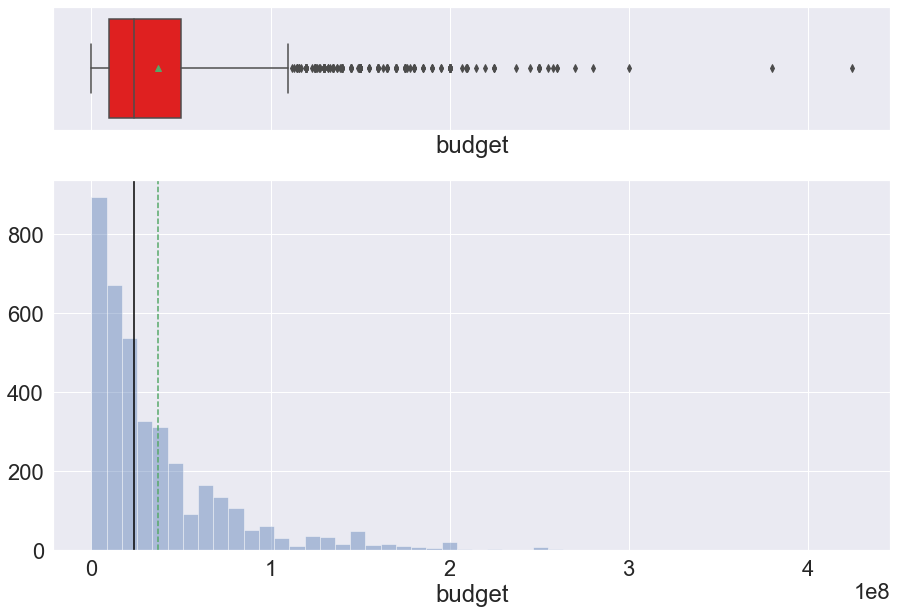

In [21]:
histogram_boxplot(df.budget)

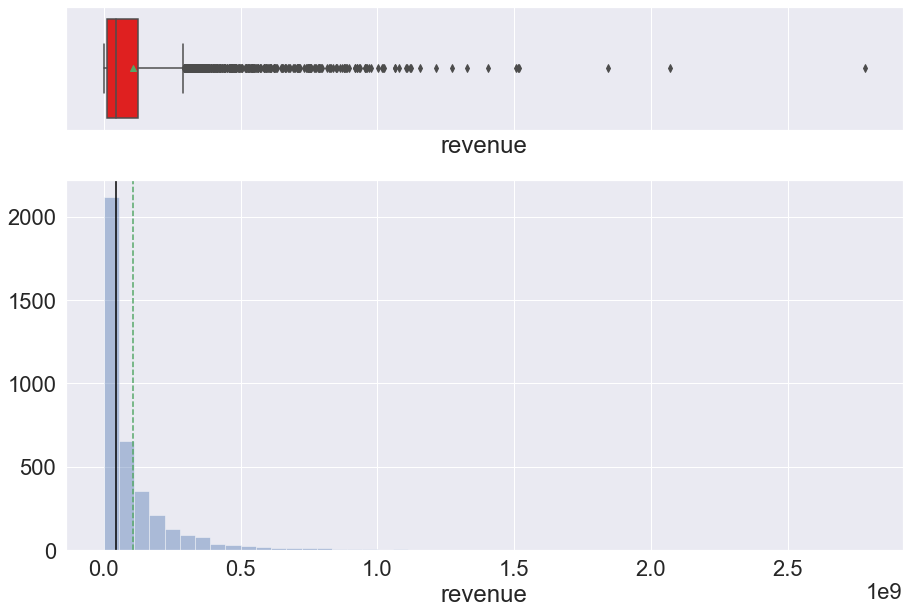

In [22]:
histogram_boxplot(df.revenue)

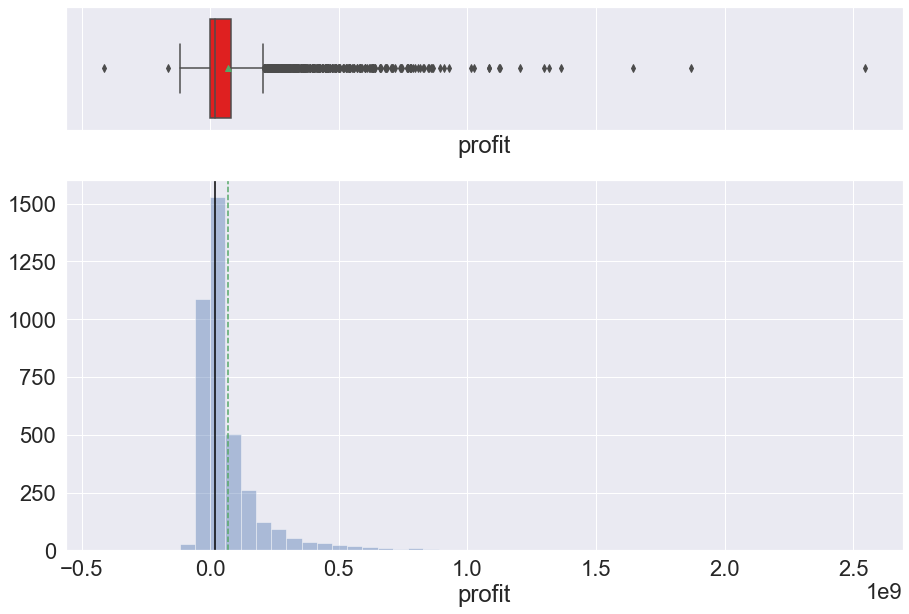

In [23]:
histogram_boxplot(df.profit)

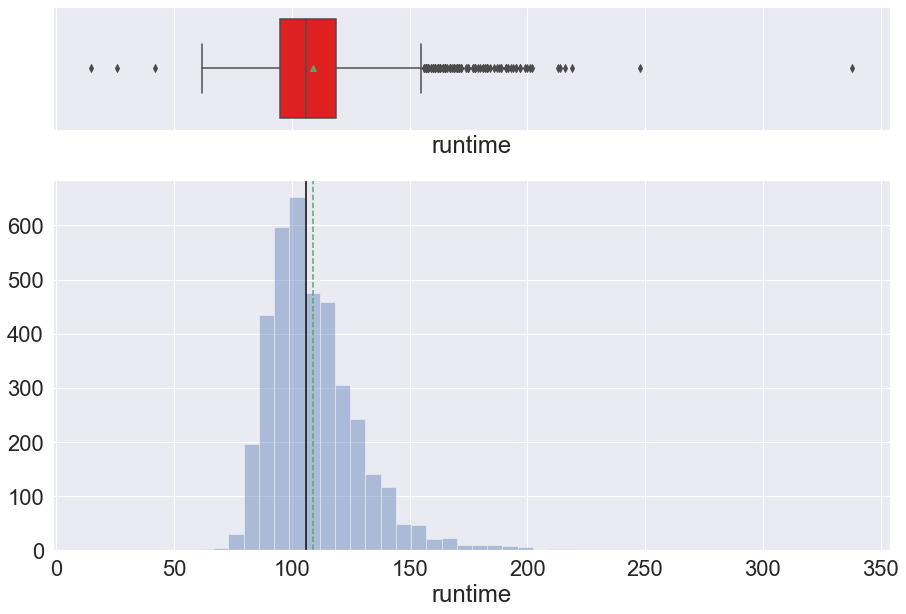

In [24]:
histogram_boxplot(df.runtime)

### observations:
- As we can see that the budget, revemue and profit avariables are right skewed and  have a significant number of outliers in the upper quartiles which could be explained as there are few number of movies have a higher than usual budgets as well as revenue
- There are significant number of observations encountred losses but the average profit still higher than the median point.
- The distribution of the runtime variable is a little bit right skewed (almost symmetrical around the mean) with mean value close to the median 
- most of the had been run between 75 to 150 times.

**Q2- what is the most frequent genres / percentage of total movies among the dataset ?**

In [29]:
# count the number of observations in each genre 
df['main_genre'].value_counts()

Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Music               29
Documentary         28
War                 20
History             17
Western             16
TV Movie             1
Name: main_genre, dtype: int64

In [25]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

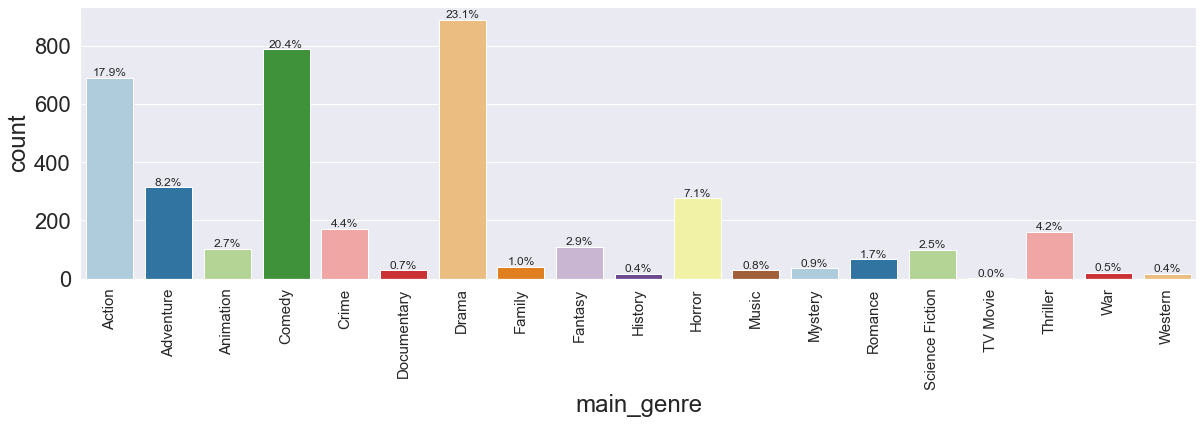

In [27]:
labeled_barplot(df, "main_genre", perc=True)

#### observation:
- Drama movies comes the most popular genre represents 23.1% from all the observations followed by comedy and action respectively.

### Multivariate Analysis
Let's check the correlation between the profit and other numerical variables

***Q3- what is the relatioship between profit and other factors ?*** 

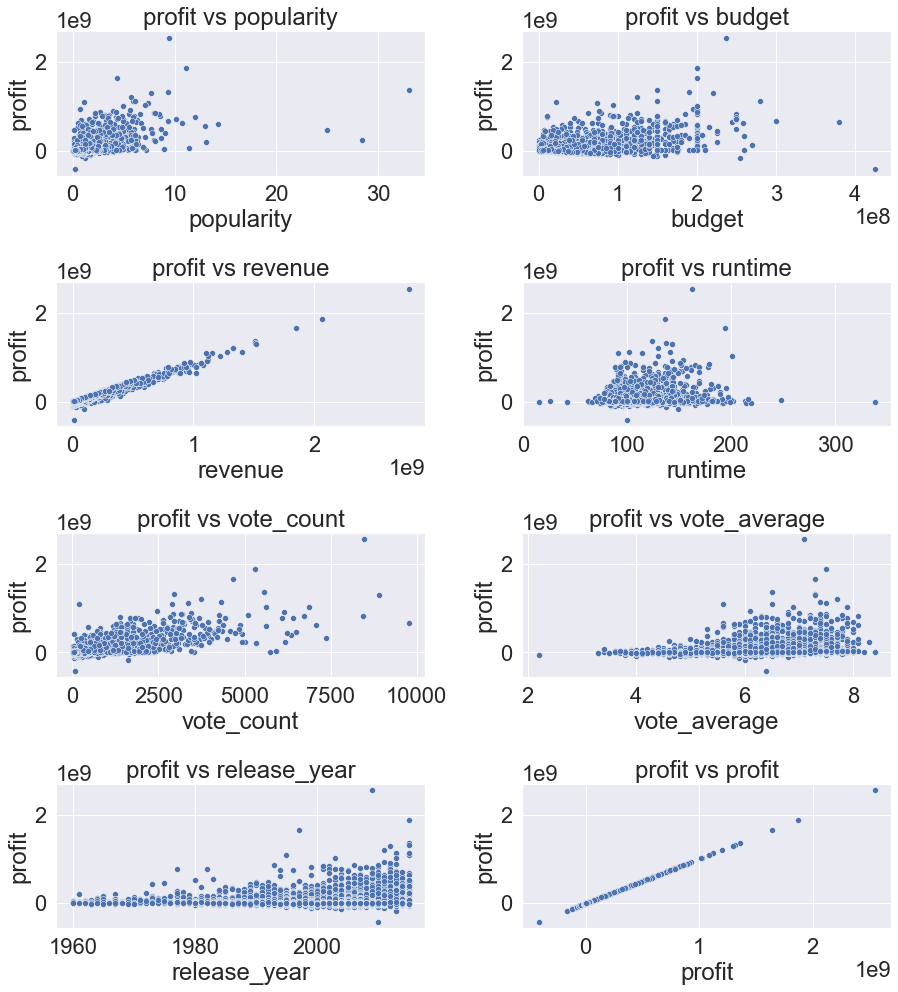

In [32]:
numeric_columns= numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df[variable],y=df['profit']).set(title='profit vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [33]:
# calculate the correlation between profit and other variables 
df['profit'].corr(df['popularity'])

0.5960802044338923

In [34]:
# calculate the correlation between profit and other variables 
df['profit'].corr(df['budget'])

0.5266595220688898

In [35]:
# calculate the correlation between profit and other variables 
df['profit'].corr(df['revenue'])

0.9791384505651666

In [36]:
# calculate the correlation between profit and other variables 
df['profit'].corr(df['vote_count'])

0.7282758312237962

In [37]:
# calculate the correlation between profit and other variables 
df['profit'].corr(df['vote_average'])

0.2595026227461493

Observations:

- profit and the revenue are strongly correlated as expected.
- there is higher than moderate relatioship between the profit and poularity 
- there is moderate relatioship between the profit and the runtime as well as the budget
- movies with higher profits have a higher vote counts

***Q4- what are the characteristics of top 10 movies in terms of popularity ?***

In [38]:
df['popularity'].nlargest(n=10)

0       32.985763
1       28.419936
629     24.949134
630     14.311205
2       13.112507
631     12.971027
1329    12.037933
632     11.422751
3       11.173104
633     10.739009
Name: popularity, dtype: float64

In [39]:
# crerate a query with the top 10 movies in terms of popularity
df_P = df.query('popularity >= 10.739009')
df_P

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,main_actor,main_genre,profit
0,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124.0,5562,6.5,2015,Chris Pratt,Action,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,George Miller,120.0,6185,7.1,2015,Tom Hardy,Action,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Robert Schwentke,119.0,2480,6.3,2015,Shailene Woodley,Adventure,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,J.J. Abrams,136.0,5292,7.5,2015,Harrison Ford,Action,1.868178e+09
629,24.949134,165000000.0,6.217525e+08,Christopher Nolan,169.0,6498,8.0,2014,Matthew McConaughey,Adventure,4.567525e+08
630,14.311205,170000000.0,7.733124e+08,James Gunn,121.0,5612,7.9,2014,Chris Pratt,Action,6.033124e+08
631,12.971027,170000000.0,7.147666e+08,Joe Russo|Anthony Russo,136.0,3848,7.6,2014,Chris Evans,Action,5.447666e+08
632,11.422751,20000000.0,7.873990e+07,Chad Stahelski|David Leitch,101.0,2712,7.0,2014,Keanu Reeves,Action,5.873990e+07
633,10.739009,125000000.0,7.521002e+08,Francis Lawrence,123.0,3590,6.6,2014,Jennifer Lawrence,Science Fiction,6.271002e+08
1329,12.037933,11000000.0,7.753980e+08,George Lucas,121.0,4428,7.9,1977,Mark Hamill,Adventure,7.643980e+08


In [40]:
df_P.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,17.212237,1.271000e+08,7.971451e+08,127.000000,4620.700000,7.240000,2010.700000,6.700451e+08
std,8.274145,6.388088e+07,5.880933e+08,17.676098,1422.553576,0.629285,11.851395,5.574327e+08
min,10.739009,1.100000e+07,7.873990e+07,101.000000,2480.000000,6.300000,1977.000000,5.873990e+07
25%,11.576547,1.137500e+08,4.392654e+08,120.250000,3654.500000,6.700000,2014.000000,2.855154e+08
50%,13.041767,1.500000e+08,7.334334e+08,122.000000,4860.000000,7.300000,2014.000000,5.740395e+08
75%,22.289652,1.687500e+08,7.748766e+08,133.000000,5599.500000,7.825000,2015.000000,7.300736e+08
max,32.985763,2.000000e+08,2.068178e+09,169.000000,6498.000000,8.000000,2015.000000,1.868178e+09


observations:
- the top highest 10 movies in terms of poularity achieved score between ~10.74 up to ~33 .
- seems that the most popular genre is action as it appears 6 times out of the 10 most popular movies followed by adventure. 
- most popular movies have been watched from 100 up to 169 times
- the avergae budget for the top 10 most watched movies is around 127 millions.
- the average revenue for the top 10 most popular movies is 797 millions.

***Q5- what is the most whatched genre (sum of runtimes per genre) ?***

In [42]:
df.groupby(['main_genre'], as_index=False)['runtime'].sum().sort_values(by='runtime',ascending=False)

,main_genre,runtime
6,Drama,104557.0
3,Comedy,80386.0
0,Action,76124.0
1,Adventure,36048.0
10,Horror,26887.0
4,Crime,19640.0
16,Thriller,17643.0
8,Fantasy,11497.0
14,Science Fiction,10831.0
2,Animation,9294.0


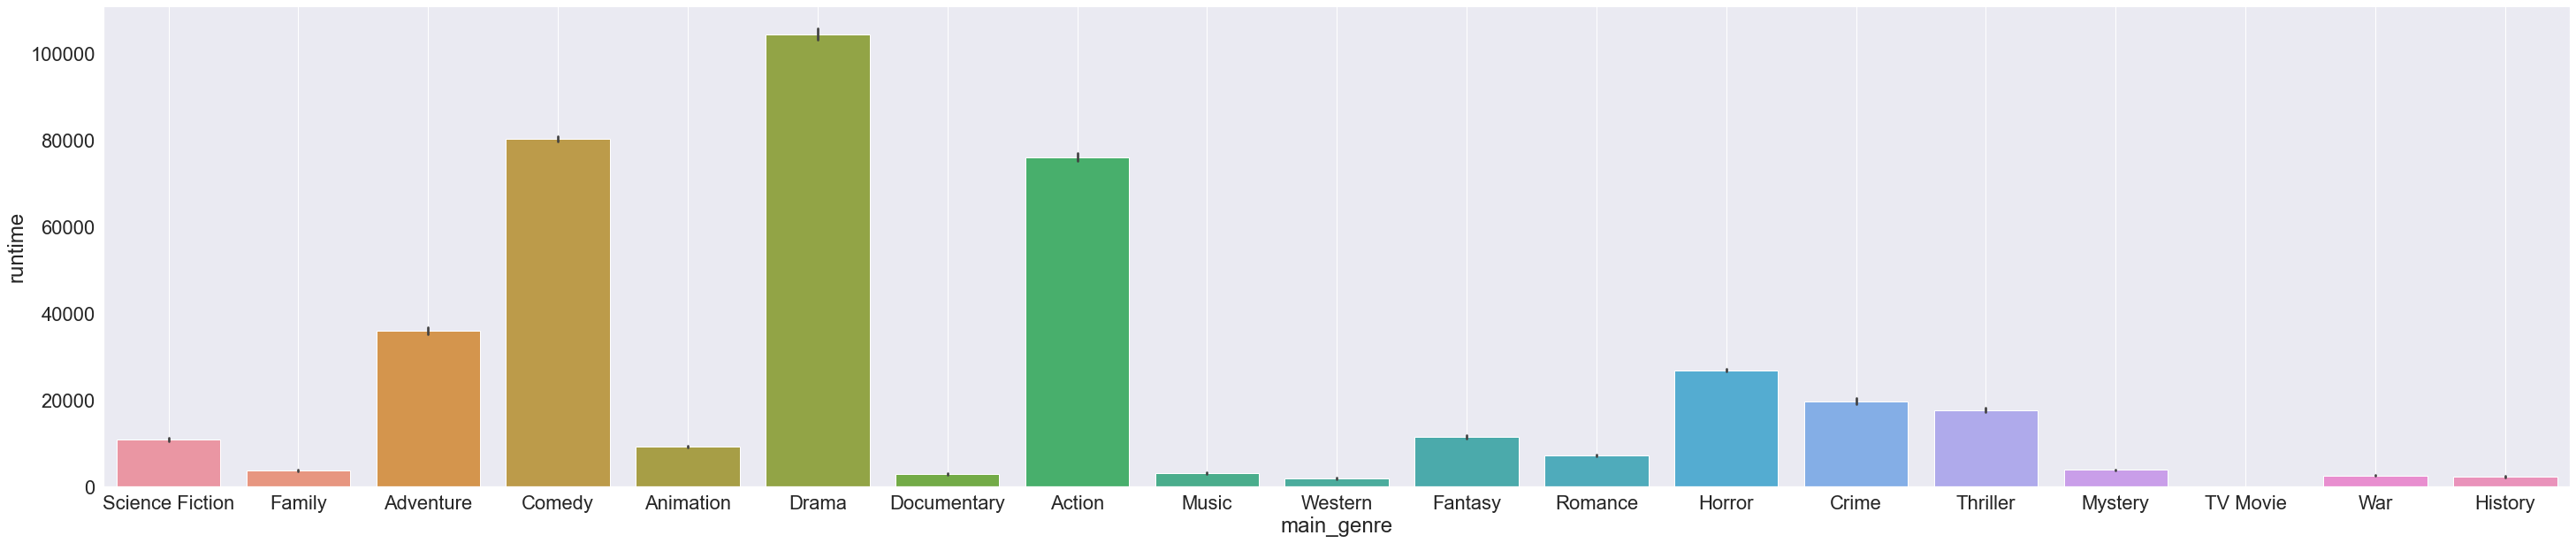

In [44]:
# runtime for each genre 
plt.figure(figsize=(50,10))
sns.set(font_scale=2)
sns.barplot(x='main_genre', y='runtime',estimator=sum, data=df.sort_values(by='runtime'))
plt.grid()

observation:
- the most watched genre (highest sum of runtime) is the Drama genre followed by comedy and action respectively .

***Q6-How do the sum of revenues and average profits change over years ? ***

<AxesSubplot:title={'center':'Sum of revenue over years'}, xlabel='release_year', ylabel='revenue'>

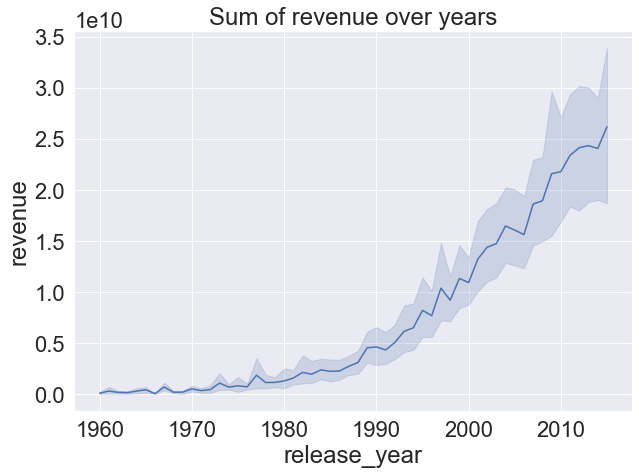

In [45]:
# revenue over years ( sum of revenues over years) 
plt.figure(figsize=(10,7))
plt.title("Sum of revenue over years")
sns.lineplot(x='release_year', y='revenue',estimator='sum', 
             data=df)

observation:
- Sum of revenues of movies for each year shows ascending trend over time from 1960 till now.

<AxesSubplot:title={'center':'profits over years'}, xlabel='release_year', ylabel='profit'>

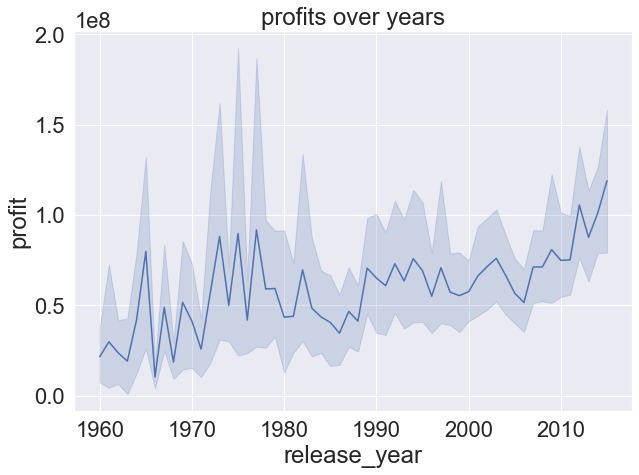

In [47]:
# profits over years ( average profits for each year)
plt.figure(figsize=(10,7))
plt.title("profits over years")
sns.lineplot(x='release_year', y='profit',estimator='mean', 
             data=df)

observation:
- the average profits shows a hesitant ascending trend over time. 

***Q7- What are the top profitable genres ?***

In [49]:
df.groupby(['main_genre'], as_index=False)['profit'].sum().sort_values(by='profit',ascending=False)

,main_genre,profit
0,Action,5.800213e+10
1,Adventure,4.914352e+10
3,Comedy,4.137776e+10
6,Drama,3.568153e+10
2,Animation,2.020039e+10
14,Science Fiction,1.186468e+10
8,Fantasy,1.145925e+10
10,Horror,1.095078e+10
4,Crime,7.768517e+09
16,Thriller,7.236340e+09


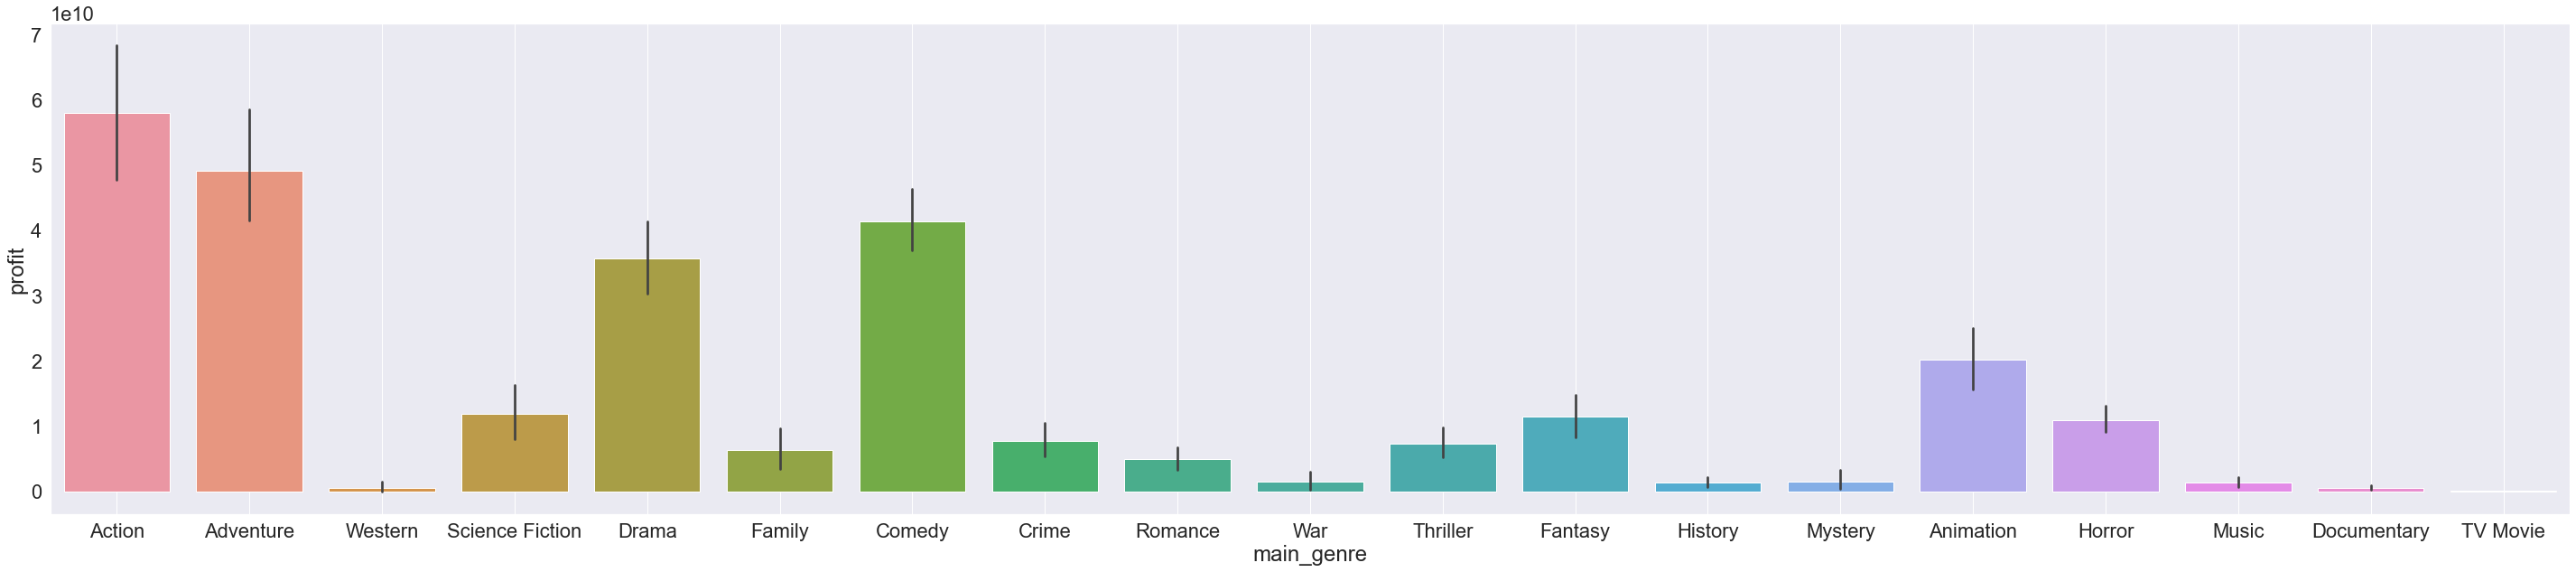

In [50]:
# profit for each genre 
plt.figure(figsize=(50,10))
sns.set(font_scale=2)
sns.barplot(x='main_genre',estimator=sum, y='profit', data=df)
plt.grid()

observation: 
- the top profitable genre is the Action genre followed by adventue, comedy and drama respectively.

***Q8- what is the average vote recieved for most profitable genre ?***

we know that Action is the most profitable genre so let's separate the action genre in new query 

In [54]:
# crerate a query with the action genre
df_g = df.query('main_genre == "Action"')
df_g.mean()

popularity      1.442326e+00
budget          5.174563e+07
revenue         1.359287e+08
runtime         1.104848e+02
vote_count      7.234862e+02
vote_average    5.996517e+00
release_year    2.000781e+03
profit          8.418307e+07
dtype: float64

observation: 
- the average vote recieved for the action genre (most profitable genre) is 5.99 

***Q9- How does the average profit of the top 4 profitable genres changes over the last 10 years?***

In [134]:
df_top4 = df[(df.main_genre == "Action") | (df.main_genre == "Adventure") | (df.main_genre == "Drama") |(df.main_genre == "Comedy")]

In [135]:
df_top4

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,main_actor,main_genre,profit
0,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124.0,5562,6.5,2015,Chris Pratt,Action,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,George Miller,120.0,6185,7.1,2015,Tom Hardy,Action,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Robert Schwentke,119.0,2480,6.3,2015,Shailene Woodley,Adventure,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,J.J. Abrams,136.0,5292,7.5,2015,Harrison Ford,Action,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,James Wan,137.0,2947,7.3,2015,Vin Diesel,Action,1.316249e+09
...,...,...,...,...,...,...,...,...,...,...,...
10793,0.226002,1000000.0,3.713768e+06,Martin Rosen,88.0,67,6.8,1978,John Hurt,Adventure,2.713768e+06
10822,0.670274,7500000.0,3.373669e+07,Mike Nichols,131.0,74,7.5,1966,Elizabeth Taylor,Drama,2.623669e+07
10829,0.395668,4653000.0,6.000000e+06,Howard Hawks,120.0,36,6.9,1966,John Wayne,Action,1.347000e+06
10835,0.299911,12000000.0,2.000000e+07,Robert Wise,182.0,28,7.0,1966,Steve McQueen,Action,8.000000e+06


In [136]:
df_top4last10= df_top4.loc[df_top4.release_year >= 2005]

<AxesSubplot:title={'center':'Profit of top 4 profitable genres last 10 years'}, xlabel='release_year', ylabel='profit'>

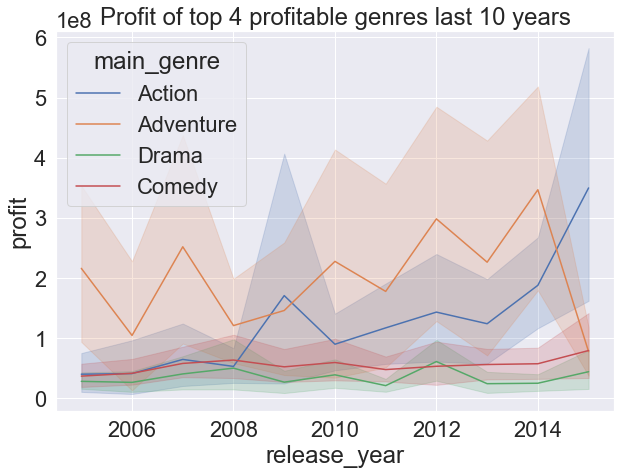

In [138]:
plt.figure(figsize=(10,7))
plt.title("Profit of top 4 profitable genres last 10 years")
sns.lineplot(x='release_year', y='profit',estimator="mean",hue='main_genre', data=df_top4last10)

observation: 
- The average profit trend of both the comedy and the drama genres remains steady over the last 10 years
- The adventure genre average profit trend shows gradual increaing from 2008 to 2014. However it decreased steeply within the last year which could be explained as the shortage of the avaiable adventure movies data 
- What is interesting in this, the action genre show gradual increace with rapid rise within the last 5 years 